In [1]:
%matplotlib inline
import seaborn as sns
sns.set_theme()

import pandas as pd
from tqdm import tqdm

import benchmark

In [2]:
FIB_VALUE = 30
BENCHMARKED_FUNCTION_NAMES = list(benchmark.BENCHMARKED_FUNCTIONS.keys())
NUM_THREADS_LIST = list(range(1, 25))

In [3]:
results = []
for benchmark_fn_name in ["py_fib", "cpp_fib", "cpp_fib_nogil"]:
    print(f"Benchmarking {benchmark_fn_name}...")
    for num_threads in tqdm(NUM_THREADS_LIST, desc="running fn for multiple number of threads"):
        timeit_result = %timeit -n 1 -o -q benchmark.run_benchmark(benchmark_fn_name, FIB_VALUE, num_threads)
        result = {
            "fn_name": benchmark_fn_name,
            "fib_value": FIB_VALUE,
            "num_threads": num_threads,
            "time_elapsed": timeit_result.average,
        }
        results.append(result)
df = pd.DataFrame.from_records(results)

Benchmarking py_fib...


running fn for multiple number of threads: 100%|████████████████████████████████| 24/24 [07:18<00:00, 18.27s/it]


Benchmarking cpp_fib...


running fn for multiple number of threads: 100%|████████████████████████████████| 24/24 [00:07<00:00,  3.37it/s]


Benchmarking cpp_fib_nogil...


running fn for multiple number of threads: 100%|████████████████████████████████| 24/24 [00:00<00:00, 30.87it/s]


In [4]:
df.head()

,fn_name,fib_value,num_threads,time_elapsed
0,py_fib,30,1,0.163412
1,py_fib,30,2,0.371190
2,py_fib,30,3,0.582890
3,py_fib,30,4,0.806103
4,py_fib,30,5,1.011831


[Text(0.5, 0, 'function name'),
 Text(0, 0.5, 'time elapsed relative to cpp_fib_nogil'),
 Text(0.5, 1.0, 'time elapsed (relative)')]

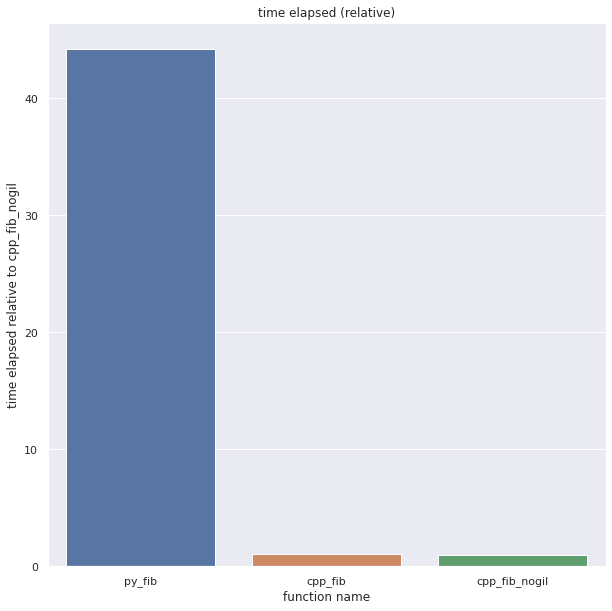

In [7]:
min_time_elapsed = df[df.num_threads == 1].time_elapsed.min()
df["relative_time_elapsed"] = df.time_elapsed / min_time_elapsed
sns.set(rc={"figure.figsize":(10, 10)})
fig = sns.barplot(x="fn_name", y="relative_time_elapsed", data=df[df.num_threads == 1])
fig.set(xlabel ="function name", ylabel = "time elapsed relative to cpp_fib_nogil", title ='time elapsed (relative)')

[Text(0.5, 0, 'number of threads'),
 Text(0, 0.5, 'time elapsed (seconds)'),
 Text(0.5, 1.0, 'time elapsed vs number of threads'),
 (0.0, 0.05)]

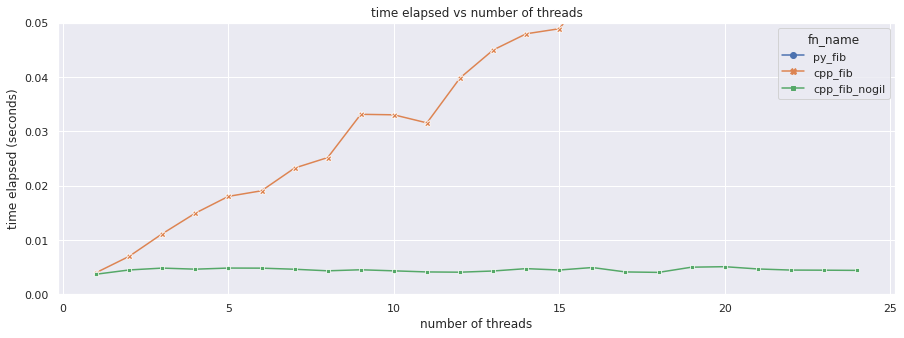

In [6]:
sns.set(rc={"figure.figsize":(15, 5)})
fig = sns.lineplot(
    data=df,
    x="num_threads", y="time_elapsed", hue="fn_name", style="fn_name",
    markers=True, dashes=False
)
fig.set(xlabel ="number of threads", ylabel = "time elapsed (seconds)", title ='time elapsed vs number of threads', ylim=(0, 0.05))